In [1]:
#Disadvantage2: Inefficiency for Some Distributions.Measuring the time 
# taken to generate samples using both methods and visualize the results. 
import numpy as np
import time
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import norm

# Parameters
max_samples = 900000
step_size = 70000
num_repeats = 5  # Number of repetitions for each sample size

# Function to measure time for generating samples using inverse transform method
def measure_time_inverse_transform(num_samples):
    u = np.random.uniform(0, 1, num_samples)
    start_time = time.time()
    samples = norm.ppf(u)
    end_time = time.time()
    return end_time - start_time

# Function to measure time for generating samples using Box-Muller transform
def measure_time_box_muller(num_samples):
    u1 = np.random.uniform(0, 1, num_samples)
    u2 = np.random.uniform(0, 1, num_samples)
    start_time = time.time()
    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
    z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2.0 * np.pi * u2)
    end_time = time.time()
    return end_time - start_time

# Measure time for different sample sizes with multiple repetitions for both methods
sample_sizes = range(step_size, max_samples + 1, step_size)
inverse_transform_times = []
box_muller_times = []

for size in sample_sizes:
    # Measure time for inverse transform method
    inverse_transform_time_measurements = [measure_time_inverse_transform(size) for _ in range(num_repeats)]
    average_inverse_transform_time = np.mean(inverse_transform_time_measurements)
    inverse_transform_times.append(average_inverse_transform_time)

    # Measure time for Box-Muller transform
    box_muller_time_measurements = [measure_time_box_muller(size) for _ in range(num_repeats)]
    average_box_muller_time = np.mean(box_muller_time_measurements)
    box_muller_times.append(average_box_muller_time)

# Create an interactive plot with Plotly
fig = make_subplots()

# Add trace for Inverse Transform method
fig.add_trace(go.Scatter(
    x=list(sample_sizes),
    y=inverse_transform_times,
    mode='lines+markers',
    name='Inverse Transform Time',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Add trace for Box-Muller method
fig.add_trace(go.Scatter(
    x=list(sample_sizes),
    y=box_muller_times,
    mode='lines+markers',
    name='Box-Muller Time',
    line=dict(color='green'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Comparison of Time Complexity: Inverse Transform vs Box-Muller Method',
    xaxis_title='Number of Samples',
    yaxis_title='Time (seconds)',
    legend=dict(x=0.1, y=0.9),
    template='plotly_white'
)

# Show plot
fig.show()




Memory usage for storing 1000000 inverse CDF values: 7.63 MB
Time for direct computation: 0.0037 seconds
Time for table lookup: 0.0052 seconds


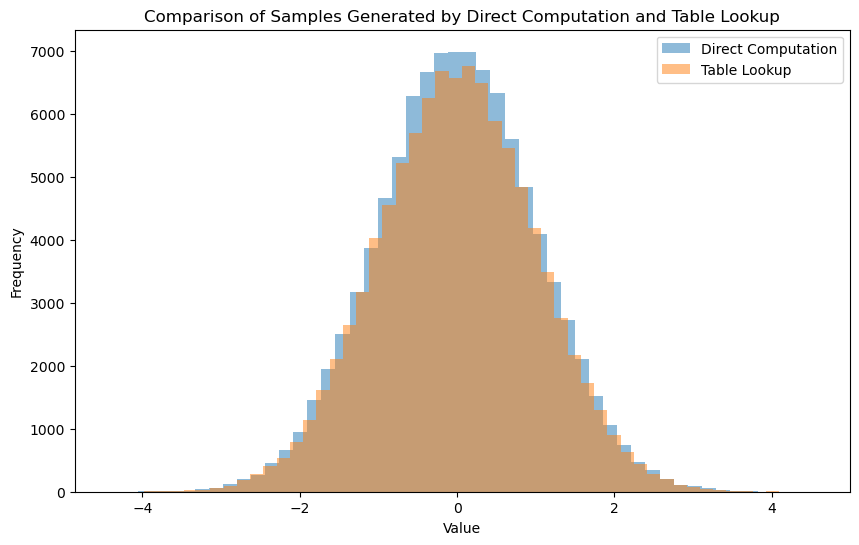

In [2]:
import numpy as np
import sys
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
num_quantiles = 1000000  # Number of precomputed quantiles

# Generate quantiles
quantiles = np.linspace(0, 1, num_quantiles)
inverse_cdf_table = norm.ppf(quantiles)

# Calculate memory usage
memory_usage = inverse_cdf_table.nbytes

# Print memory usage
print(f"Memory usage for storing {num_quantiles} inverse CDF values: {memory_usage / (1024 * 1024):.2f} MB")

# Function to generate samples using precomputed table
def generate_samples_using_table(num_samples, inverse_cdf_table):
    u = np.random.uniform(0, 1, num_samples)
    indices = np.floor(u * (len(inverse_cdf_table) - 1)).astype(int)
    samples = inverse_cdf_table[indices]
    return samples

# Measure time and memory usage for generating samples
num_samples = 100000

# Direct computation
start_time = time.time()
samples_direct = norm.ppf(np.random.uniform(0, 1, num_samples))
end_time = time.time()
time_direct = end_time - start_time

# Using precomputed table
start_time = time.time()
samples_table = generate_samples_using_table(num_samples, inverse_cdf_table)
end_time = time.time()
time_table = end_time - start_time

print(f"Time for direct computation: {time_direct:.4f} seconds")
print(f"Time for table lookup: {time_table:.4f} seconds")

# Plot the comparison of samples generated by both methods
plt.figure(figsize=(10, 6))
plt.hist(samples_direct, bins=50, alpha=0.5, label='Direct Computation')
plt.hist(samples_table, bins=50, alpha=0.5, label='Table Lookup')
plt.title('Comparison of Samples Generated by Direct Computation and Table Lookup')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
